|I/O-Bound Process|	CPU-Bound Process|
|--|--|
| Your program spends most of its time talking to a slow device, like a network connection, a hard drive, or a printer.|	You program spends most of its time doing CPU operations.|
| Speeding it up involves overlapping the times spent waiting for these devices.| Speeding it up involves finding ways to do more computations in the same amount of time.|

| Concurrency Type | Switching Decision | Number of Processors |
|--------------|-----------|------------|
| Pre-emptive multitasking (threading) | The operating system decides when to switch tasks external to Python.| 1|
| Cooperative multitasking (asyncio) | The tasks decide when to give up control. | 1|
| Multiprocessing (multiprocessing) | The processes all run at the same time on different processors.| Many|

In [1]:
import threading
import multiprocessing
import time
import sys

In [2]:
def cpu_func(result, niters):
    '''
    A useless CPU bound function.
    '''
    for i in range(niters):
        result = (result * result * i + 2 * result * i * i + 3) % 10000000
    return result

class CpuThread(threading.Thread):
    def __init__(self, niters):
        super().__init__()
        self.niters = niters
        self.result = 1
    def run(self):
        self.result = cpu_func(self.result, self.niters)

class CpuProcess(multiprocessing.Process):
    def __init__(self, niters):
        super().__init__()
        self.niters = niters
        self.result = 1
    def run(self):
        self.result = cpu_func(self.result, self.niters)

class IoThread(threading.Thread):
    def __init__(self, sleep):
        super().__init__()
        self.sleep = sleep
        self.result = self.sleep
    def run(self):
        time.sleep(self.sleep)

class IoProcess(multiprocessing.Process):
    def __init__(self, sleep):
        super().__init__()
        self.sleep = sleep
        self.result = self.sleep
    def run(self):
        time.sleep(self.sleep)

In [14]:
if __name__ == '__main__':
    cpu_n_iters = 500000
    sleep = 1
    cpu_count = multiprocessing.cpu_count()
    input_params = [
        (CpuThread, cpu_n_iters),
        (CpuProcess, cpu_n_iters),
        (IoThread, sleep),
        (IoProcess, sleep),
    ]
    header = ['nthreads']
    results_list = []
    for thread_class, _ in input_params:
        header.append(thread_class.__name__)
    print(' '.join(header))
    for nthreads in range(1, 2 * cpu_count):
        results = [nthreads]
        for thread_class, work_size in input_params:
            start_time = time.time()
            threads = []
            for i in range(nthreads):
                thread = thread_class(work_size)
                threads.append(thread)
                thread.start()
            for i, thread in enumerate(threads):
                thread.join()
            results.append(time.time() - start_time)
        print(' '.join('{:.6e}'.format(result) for result in results))
        results_list.append(results)

nthreads CpuThread CpuProcess IoThread IoProcess
1.000000e+00 3.619986e-01 1.433006e+00 1.003213e+00 1.417256e+00
2.000000e+00 6.270070e-01 1.449982e+00 1.003901e+00 1.492973e+00
3.000000e+00 9.260094e-01 1.492968e+00 1.007475e+00 1.496097e+00
4.000000e+00 1.302943e+00 1.507056e+00 1.009218e+00 1.525013e+00
5.000000e+00 1.561030e+00 1.581995e+00 1.010297e+00 1.591685e+00
6.000000e+00 1.864017e+00 1.655797e+00 1.009461e+00 1.655607e+00
7.000000e+00 2.313000e+00 1.785013e+00 1.011499e+00 1.745467e+00
8.000000e+00 2.557989e+00 1.811211e+00 1.013873e+00 1.801916e+00
9.000000e+00 2.909030e+00 1.929888e+00 1.015188e+00 1.909618e+00
1.000000e+01 3.192922e+00 2.018377e+00 1.016929e+00 2.017855e+00
1.100000e+01 3.489019e+00 2.115698e+00 1.018779e+00 2.124717e+00
1.200000e+01 3.771013e+00 2.227961e+00 1.017799e+00 2.229400e+00
1.300000e+01 4.027010e+00 2.377691e+00 1.022096e+00 2.510583e+00
1.400000e+01 4.358999e+00 2.463514e+00 1.020988e+00 2.505461e+00
1.500000e+01 4.697000e+00 2.534052e+00 1.

[[1, 0.3619985580444336, 1.4330060482025146, 1.0032126903533936, 1.4172556400299072], [2, 0.627007007598877, 1.4499821662902832, 1.0039005279541016, 1.4929730892181396], [3, 0.9260094165802002, 1.4929676055908203, 1.0074753761291504, 1.4960973262786865], [4, 1.3029429912567139, 1.5070559978485107, 1.0092182159423828, 1.525012731552124], [5, 1.5610299110412598, 1.5819947719573975, 1.0102968215942383, 1.5916852951049805], [6, 1.8640165328979492, 1.655796766281128, 1.0094611644744873, 1.6556065082550049], [7, 2.312999963760376, 1.785013198852539, 1.0114986896514893, 1.745467185974121], [8, 2.5579891204833984, 1.8112108707427979, 1.0138728618621826, 1.8019163608551025], [9, 2.9090304374694824, 1.9298877716064453, 1.015188455581665, 1.9096176624298096], [10, 3.1929221153259277, 2.0183773040771484, 1.0169291496276855, 2.017855167388916], [11, 3.489018678665161, 2.1156983375549316, 1.0187792778015137, 2.1247165203094482], [12, 3.7710132598876953, 2.2279608249664307, 1.017798662185669, 2.22940

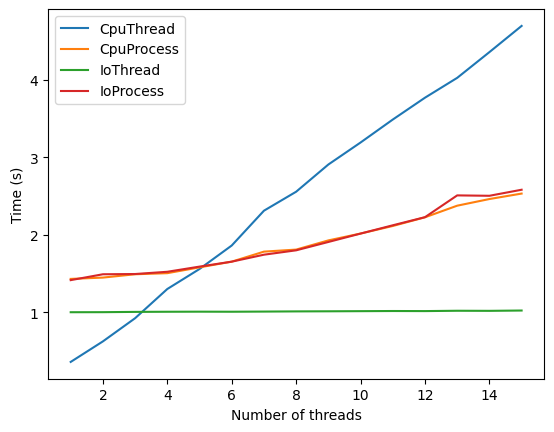

In [24]:
# plot the results list
import matplotlib.pyplot as plt
import numpy as np
print(results_list)
plt.figure()
for i, (thread_class, _) in enumerate(input_params):
    plt.plot(np.array(results_list)[:, 0], np.array(results_list)[:, i + 1], label=thread_class.__name__)
plt.legend()
plt.xlabel('Number of threads')
plt.ylabel('Time (s)')
# plt.savefig('threading_vs_multiprocessing.png')
plt.show()